<a href="https://colab.research.google.com/github/dajebbar/FreeCodeCamp-python-data-analysis/blob/main/PR_Curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Precision Recall Curve

For imbalanced classification with severe skew and few examples of the minority class, the ROC AUC can be misleading. The focus of the PR curve on the minority class make it an effective diagnostic of imbalanced binary classification models. A Precision Recall Curve (PRC) is a plot of a precision (y-axis) and the recall (x-axis) for differents proba thresholds.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
!pip install opendatasets --upgrade --quiet

In [3]:
import opendatasets as od 

url = 'https://www.kaggle.com/mathchi/diabetes-data-set'
od.download(url)

Skipping, found downloaded files in "./diabetes-data-set" (use force=True to force download)


In [4]:
diabete = pd.read_csv('./diabetes-data-set/diabetes.csv')
diabete.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data = diabete.drop('Outcome', axis=1)
target = diabete.Outcome

target.value_counts(normalize=True, dropna=False).round(3) * 100

0    65.1
1    34.9
Name: Outcome, dtype: float64

Imbalanced class

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target,
                                                    test_size=.2, random_state=0,
                                                    stratify=target)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((614, 8), (614,), (154, 8), (154,))

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=data.columns)
X_test = pd.DataFrame(X_test, columns=data.columns)

X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.848617,0.088890,-0.463490,0.740704,-0.684276,0.492325,0.101559,-1.043525
1,-0.848617,-0.877925,0.053182,0.677424,-0.684276,-0.203092,-0.498060,-0.873662
2,0.046147,-0.971487,0.983192,1.689902,-0.205195,0.737009,-0.356442,-0.364072
3,-0.550362,-0.129423,1.086526,-0.081934,-0.054373,-0.872753,-0.504087,-1.043525
4,-0.848617,-0.784362,-0.256821,0.424305,0.087577,0.157494,-0.576402,-1.043525


In [8]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, y_train)

LogisticRegression()

In [11]:
pred = lr.predict_proba(X_test)
pred.shape

(154, 2)

In [12]:
# Retrieve just the positive class probas
pos_probs = pred[:, 1]

In [13]:
from sklearn.metrics import (
    precision_recall_curve,
    auc,
)

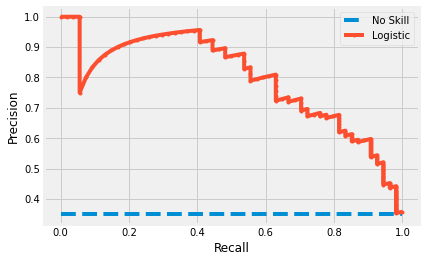

In [16]:
# Calculate the no skill line as the proportion of the positive class
no_skill = len(target[target==1]) / len(target)

# Plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')

# Calculate the model precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, pos_probs)

# Plot the model precision-recall curve
plt.plot(recall, precision, marker='.', label='Logistic')

# Axes labels
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.legend()


In [17]:
# Calculate the precision recall auc
auc_score = auc(recall, precision)
print(f'Logistic Regression PR AUC: {auc_score: .3f}')

Logistic Regression PR AUC:  0.793


In [18]:
# No skill model , stratified random class predictions
from sklearn.dummy import DummyClassifier

bm = DummyClassifier()
bm.fit(X_train, y_train)
y_pred = bm.predict_proba(X_test)
pos_prob_bm = y_pred[:, 1]

In [19]:
# Calculate the precision recall auc
bm_precision, bm_recall, _ = precision_recall_curve(y_test, pos_prob_bm)
bm_auc_score = auc(bm_precision, bm_recall)

print(f'Base Model PR AUC: {bm_auc_score: .3f}')

Base Model PR AUC:  0.325
